In [1]:
import tensorflow as tf

### 1 Convolutional Neural Network 

Used for computer vision(detecting patterns in visual data).


Image is in the form `(width, height, Colour Channels)`

Note - Top prepare the data, preprocessing steps such as, moving the images into differernt subset folders

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

- `train` directoru contains all of the images in the training dataset with subdirectories each named after a certain class containing image of that class

- `test` directory with same structure as the `train` directory.

In [4]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"{len(dirnames)} directories and {len(filenames)} images in {dirpath}")

2 directories and 0 images in pizza_steak
2 directories and 0 images in pizza_steak\test
0 directories and 250 images in pizza_steak\test\pizza
0 directories and 250 images in pizza_steak\test\steak
2 directories and 0 images in pizza_steak\train
0 directories and 750 images in pizza_steak\train\pizza
0 directories and 750 images in pizza_steak\train\steak


In [5]:
# Another way to fidn out how many images are in a folder
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
# Get class names, more helpful when working with a longer list of class names
import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


Conclusion - Train samples 750, Test samples - 250 each of pizza and steak

### 2 Visualize Visualize Visualize

In [7]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import os
import random
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    # Read in the image and plot it using matplotlib
    img=mpimg.imread(target_folder+"/"+random_image[0])
    # print(os.access(target_folder+"/"+random_image[0], os.R_OK))  # Should return True
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape:{img.shape}")
    return img

Image shape:(306, 512, 3)


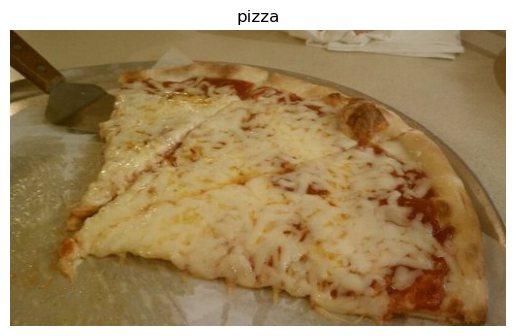

In [9]:
img=view_random_image(target_dir="pizza_steak/train/",
target_class="pizza")

In [10]:
img

array([[[ 55,  35,   2],
        [ 70,  50,  17],
        [101,  81,  46],
        ...,
        [123,  99,  61],
        [122,  98,  60],
        [123,  99,  61]],

       [[ 49,  28,   0],
        [ 55,  35,   2],
        [ 72,  52,  19],
        ...,
        [118,  94,  56],
        [120,  96,  58],
        [122,  98,  60]],

       [[ 52,  29,   0],
        [ 49,  26,   0],
        [ 53,  30,   0],
        ...,
        [112,  88,  50],
        [115,  91,  53],
        [118,  94,  56]],

       ...,

       [[109,  92,  46],
        [109,  91,  43],
        [110,  92,  44],
        ...,
        [123, 102,  71],
        [124, 104,  69],
        [123, 103,  68]],

       [[109,  91,  43],
        [109,  91,  41],
        [113,  96,  42],
        ...,
        [128, 105,  73],
        [130, 107,  75],
        [124, 101,  69]],

       [[111,  93,  45],
        [110,  92,  42],
        [113,  96,  42],
        ...,
        [128, 105,  73],
        [130, 107,  75],
        [124, 101,  69]]

In [11]:
img.shape

(306, 512, 3)

Looking at the image shape, we see it's in the form `(width,height,colorChannels)`

* as we are dealing with colour images, the colour channels value is always 3. 
* Note all of the value in the `img` array are between 0 and 255. This is because the possible range for red, green, and blue values.
* red=0, green=0, blue=255 will be totally blue
* Our model will find patterns in these different pixel values which determine what each class looks like.


- Note - Many ML models, including NN prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale**(also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [12]:
img/255.

array([[[0.21568627, 0.1372549 , 0.00784314],
        [0.2745098 , 0.19607843, 0.06666667],
        [0.39607843, 0.31764706, 0.18039216],
        ...,
        [0.48235294, 0.38823529, 0.23921569],
        [0.47843137, 0.38431373, 0.23529412],
        [0.48235294, 0.38823529, 0.23921569]],

       [[0.19215686, 0.10980392, 0.        ],
        [0.21568627, 0.1372549 , 0.00784314],
        [0.28235294, 0.20392157, 0.0745098 ],
        ...,
        [0.4627451 , 0.36862745, 0.21960784],
        [0.47058824, 0.37647059, 0.22745098],
        [0.47843137, 0.38431373, 0.23529412]],

       [[0.20392157, 0.11372549, 0.        ],
        [0.19215686, 0.10196078, 0.        ],
        [0.20784314, 0.11764706, 0.        ],
        ...,
        [0.43921569, 0.34509804, 0.19607843],
        [0.45098039, 0.35686275, 0.20784314],
        [0.4627451 , 0.36862745, 0.21960784]],

       ...,

       [[0.42745098, 0.36078431, 0.18039216],
        [0.42745098, 0.35686275, 0.16862745],
        [0.43137255, 0

### 3 Typical Architecture of a Convolutional Neural Network

- Input Image->Target Images we'd like to discover patterns in
- Input Layer->Takes in target images and preprocesses them for further layers - `input_shape=[batch_size,image_height, image_width, color_channels]`
- Convolutional Layer->Extracts/learns the most important features from target images -> Multiple, can create with `tf.keras.layers.ConvXD`
- Hidden Activation -> adds non-linearity to learned features(non-straight lines) -> Usually ReLU `tf.keras.activations.relu`
- Pooling layer-> Reduces the dimensionality of learned image features -> Average(`tf.keras.layers.AvgPool2D`) or Max(`tf.keras.layers.MaxPool2D`)
- Fully connected layer-> Further refines learned features from convolution layers -> `tf.keras.layers.Dense`
- Output layer->Takes learned features and outputs them in shape of targe labels-> `output_shape=[number_of_classes]
- Output activation->Adds non-linearities to output layer -> `tf.keras.activations.sigmoid`(binary classification) or `tf.keras.activations.softmax`

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

- A baseline is a score or evaluation metric we want to try and beat.
- CREATE A BASELINE AND TRY TO BEAT IT BY INCREASING THE COMPLEXITY OF THE MODEL.
  

In [ ]:
# Scaled-down version of VGG-16

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)
# preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# setup the train and test directories
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

# import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
            batch_size=32, # number of images to process at a time
            target_size=(224,224), # convert all images to be 224 x 224
            class_mode="binary", # type of problem we're working on
            seed=42
            )
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,
                                           target_size=(224,224),class_mode="binary",seed=42)

model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # can also be (3,3)
                           activation="relu",
                           input_shape=(224,224,3)), # first layer specifies input shape(height, width, color channel)
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2,2)
                              padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10,3,activation="relu"), 
    tf.keras.layers.Conv2D(10,3,activation="relu"), # activation='relu' == tf.keras.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid") #binary activation output
])
# compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 618ms/step - loss: 0.6347 - accuracy: 0.5953 - val_loss: 0.4566 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 21s 441ms/step - loss: 0.4762 - accuracy: 0.7993 - val_loss: 0.3707 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 21s 452ms/step - loss: 0.3989 - accuracy: 0.8307 - val_loss: 0.3089 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 21s 438ms/step - loss: 0.3596 - accuracy: 0.8440 - val_loss: 0.3984 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 21s 436ms/step - loss: 0.3385 - accuracy: 0.8593 - val_loss: 0.3152 - val_accuracy: 0.8660


In [12]:
import torch
torch.cuda.is_available()

False

In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

Few things we need to discuss:
-  `ImageDataGenerator` class and the `rescale` parameter
-  `flow_from_directory()` method
   -  `batch_size` parameter
   -  `target_size` parameter
- `Conv2D` layers(and the params)
- `MaxPool2D` layers
- `steps_per_epoch` and `validation_steps` params in the `fit()` function

In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_gpu_available()  # Should return True

Num GPUs Available:  0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [16]:
import torch
print(torch.cuda.is_available())  # Should return True
# print(torch.cuda.get_device_name(0))  # Prints your GPU model

False


In [21]:
!nvidia-smi -l 1 

^C


To use the previous classification model, we need to change two things:
* The data - we're now working with images instead of dots.
* The input shape-we have to tell our neural network the shpae of the images we're working with.


  * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224,224,3), meaning a height and width of 224 pixesl and a depth of 3 of the red, green, and blue color channels.

In [ ]:
# set random seed
tf.random.set_seed(42)
# create a model to replicate the Tensorflow Playground model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), # dense layers except a 1-Dimensional vecotr as input
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
model_2.fit(train_data, # use same training data created above
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data, # use same validation data created above
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6940 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 99ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000


Results close to 50% 

In [24]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Though `model_1` has lesser parameters still it has higher accuracy compared to `model_2`.

- `model_2` has 602141 trainable parameters where as `model_1` has only 31101. and despite the difference, `model_1` still far and large out performs `model_2`.
We can think of trainable parameters as patterns a model can learn from data.

Intuitively, we might think more is better. In some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable params connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though there are less learnable params in our CNN, there are often more helpful in deciphering between different **features** in an image.

We can try to increase the number of layers!! or increase the number of neurons in each layer!!

Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of our model.


In [ ]:
# set random seed
tf.random.set_seed(42)
# add an extra layer and increase the number of hidden units in each layer
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), # dense layers expect a 1-D vector as input
    tf.keras.layers.Dense(100,activation="relu"), # increase the number of neurons from 4 to 100 (for each layer)
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"), # add an extra layer
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 165ms/step - loss: 3.4160 - accuracy: 0.6313 - val_loss: 2.2059 - val_accuracy: 0.5920
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 1.4339 - accuracy: 0.6773 - val_loss: 0.5775 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 8s 164ms/step - loss: 0.6901 - accuracy: 0.7480 - val_loss: 1.0249 - val_accuracy: 0.6660
Epoch 4/5
47/47 [==============================] - 8s 165ms/step - loss: 0.6318 - accuracy: 0.7493 - val_loss: 0.4505 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 8s 162ms/step - loss: 0.4918 - accuracy: 0.7780 - val_loss: 0.5008 - val_accuracy: 0.7660


In [26]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The number of trainable params has increased even more than `model_2`. and even with close to 500x (~15,000,000 vs ~31,000) more trainable params, `model_3` still doesn't out perform `model_1`

- This goes to show the power of convolutional neural network and their ability to learn patterns despite using less params

### Binary Classification

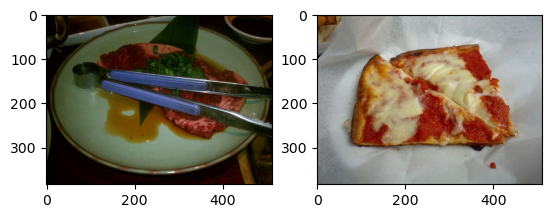

In [25]:
import matplotlib.pyplot as plt
### Plot the data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

Our next step is to turn our data into **batches**
A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.


It does this for a couple of reasons:
* 10,000 images (or more ) might not fit into the memory of your processor(GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.




In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

* `rescale` param -> an example of transformations we're doing.



* We can load our images from their respective directories using the `flow_from_directory` method.
* 

In [33]:
# Turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32
                                             )
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


- `class_mode` defines our classification problem type. If we had more than two classes, we would use `categorical`.
- `batch_size` defines how many images will be in each batch, we've used 32 which same as default

In [ ]:
images,labels=train_data.next() # get the next batch of images/labels
len(images),len(labels)

(32, 32)

Our images and labels are in batches of 32

In [35]:
images[:2],images[0].shape

(array([[[[0.6117647 , 0.49411768, 0.454902  ],
          [0.654902  , 0.5019608 , 0.48235297],
          [0.6156863 , 0.43921572, 0.427451  ],
          ...,
          [0.5764706 , 0.6431373 , 0.7607844 ],
          [0.58431375, 0.6431373 , 0.7568628 ],
          [0.60784316, 0.6627451 , 0.7686275 ]],
 
         [[0.5137255 , 0.38823533, 0.3372549 ],
          [0.33333334, 0.18431373, 0.14901961],
          [0.28627452, 0.10980393, 0.09019608],
          ...,
          [0.5764706 , 0.6313726 , 0.7372549 ],
          [0.5882353 , 0.6313726 , 0.7411765 ],
          [0.6039216 , 0.6431373 , 0.7490196 ]],
 
         [[0.43529415, 0.29803923, 0.22352943],
          [0.37647063, 0.21176472, 0.15686275],
          [0.41960788, 0.23529413, 0.20392159],
          ...,
          [0.5882353 , 0.6117647 , 0.7058824 ],
          [0.6039216 , 0.627451  , 0.72156864],
          [0.6156863 , 0.63529414, 0.72156864]],
 
         ...,
 
         [[0.30588236, 0.17254902, 0.07450981],
          [0.27058

Due to our `rescale` parameter, the images are now in (224,224,3) shape tensors with values between 0 and 1

In [36]:
labels

array([1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
      dtype=float32)

Due to `class_mode` parameter being `binary` our labels are either `0` or `1`

### 3. Create a model

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [16]:
# create the model(a 3 layer convolutional neural network)
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),# input layer(specify input shape)
        Conv2D(10,3,activation="relu"),
        Conv2D(10,3,activation="relu"),
        Flatten(),
        Dense(1,activation="sigmoid")# output layer(specify output shape)
])

Discussing some of the components of `Conv2D` layer:
- `2D` means our input are two dimensional(height and width), even though they have 3 colour channels, the convolutions are run on each channel individually.
- `filters` - these are the number of "feature extractors" that will be moving over our images.

In [39]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [45]:
history_4=model_4.fit(train_data,epochs=5,validation_data=test_data,validation_steps=len(test_data),steps_per_epoch=len(train_data))

Epoch 1/5
47/47 [==============================] - 22s 477ms/step - loss: 0.3541 - accuracy: 0.8580 - val_loss: 0.4737 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 21s 439ms/step - loss: 0.2144 - accuracy: 0.9293 - val_loss: 0.4907 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 21s 449ms/step - loss: 0.0997 - accuracy: 0.9687 - val_loss: 0.5332 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 21s 442ms/step - loss: 0.0547 - accuracy: 0.9887 - val_loss: 0.6109 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.6695 - val_accuracy: 0.8000


### Evaluate the model


<Axes: >

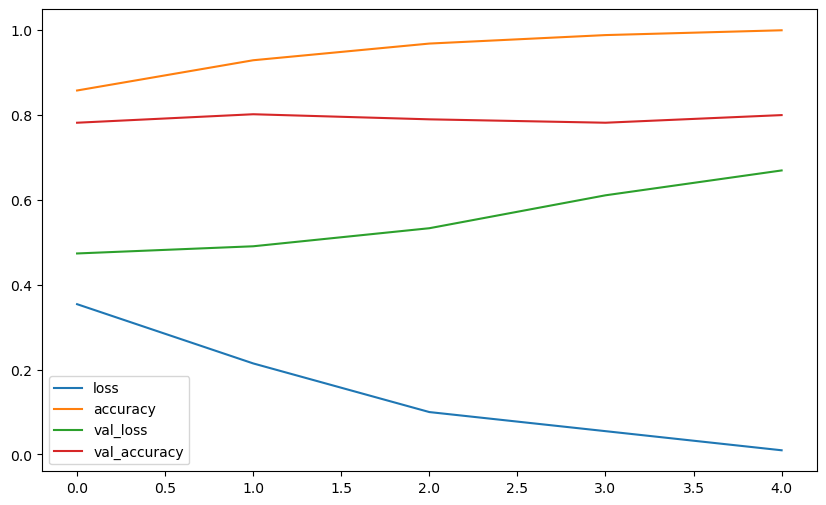

In [46]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,6))

In [47]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 6. Adjust the model parameters